# import library

In [2]:
import tensorflow
from tensorflow.keras.datasets import mnist

In [6]:
#load MNIST dataset
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [8]:
print(x_train.shape)

(60000, 28, 28)


In [9]:
x_train[0].shape

(28, 28)

In [10]:
from matplotlib import pyplot as plt

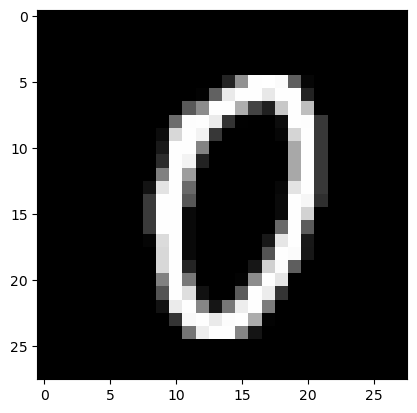

In [11]:
plt.imshow(x_train[1000])
plt.gray()
plt.show()

In [12]:
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend as k 

In [13]:
k.set_image_data_format('channels_last')

In [14]:
#set image information
channels=1
height=28
width=28

In [15]:
x_train.shape

(60000, 28, 28)

In [16]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [19]:
train_data=x_train.reshape(x_train.shape[0],height,width,channels)

In [20]:
train_data.shape

(60000, 28, 28, 1)

In [21]:
test_data=x_test.reshape(x_test.shape[0],height,width,channels)

In [22]:
test_data.shape

(10000, 28, 28, 1)

In [23]:
x_train.max()

255

In [24]:
# scale the data
train_data=train_data/255
test_data=test_data/255

In [25]:
train_data.max()

1.0

In [26]:
# one hot encoding outcome
train_target=to_categorical(y_train)
test_target=to_categorical(y_test)

In [27]:
#number of classes
number_of_classes=test_target.shape[1]

In [28]:
#model building
model=Sequential()
model.add(Conv2D(filters=64,kernel_size=(5,5),input_shape=(width,height,channels),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(5,5),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation="relu"))

model.add(Dense(number_of_classes,activation="softmax"))


In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 64)        1664      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 32)          51232     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 128)              

In [30]:
#compile the model
model.compile(loss="categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [31]:
from livelossplot import PlotLossesKerasTF

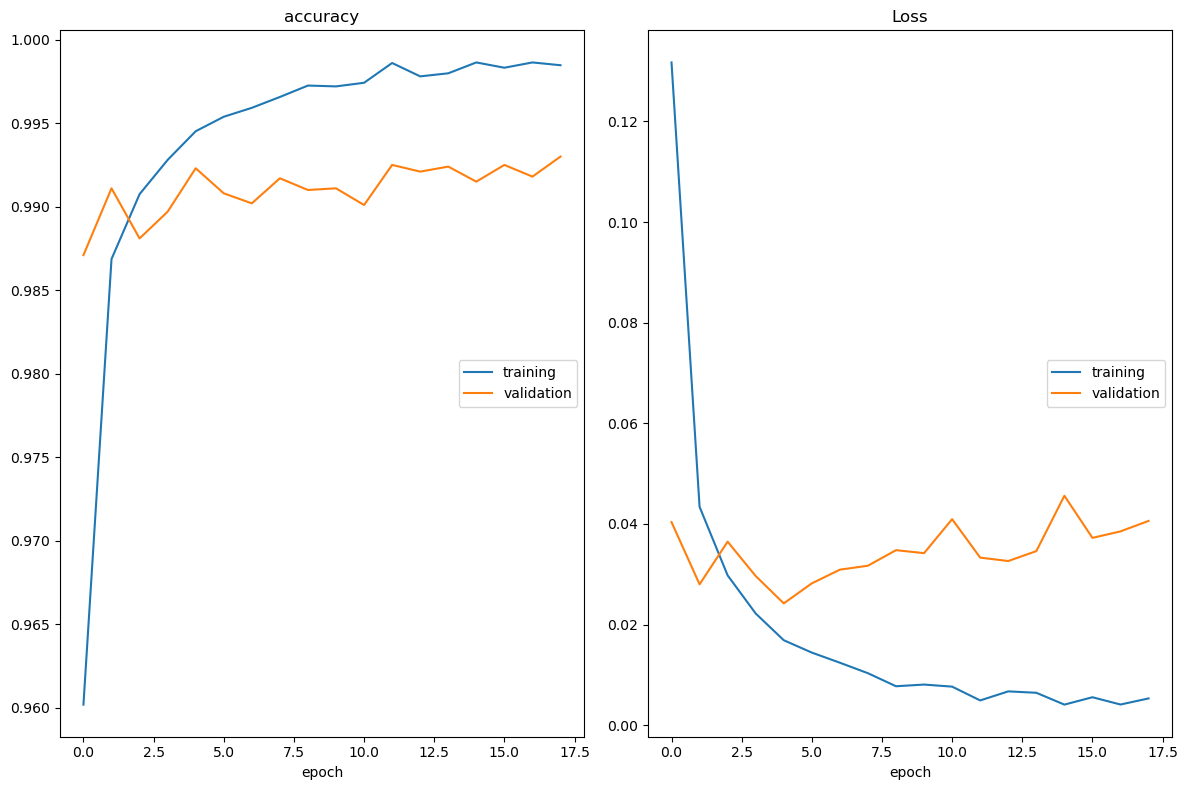

accuracy
	training         	 (min:    0.960, max:    0.999, cur:    0.998)
	validation       	 (min:    0.987, max:    0.993, cur:    0.993)
Loss
	training         	 (min:    0.004, max:    0.132, cur:    0.005)
	validation       	 (min:    0.024, max:    0.046, cur:    0.041)
1875/1875 [==============================] - 274s 146ms/step - loss: 0.0053 - accuracy: 0.9985 - val_loss: 0.0406 - val_accuracy: 0.9930


In [32]:
#train the model
res=model.fit(train_data,train_target,epochs=18,validation_data=(test_data,test_target),callbacks=[PlotLossesKerasTF()])